In [1]:
import json,os
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def stdOverOptMinusMean(dist,opt_type='max'): # example: dist = np.array([[3,1],[1,49],[0,950]])
    dist_copy = dist.copy()
    if opt_type == 'max':
        opt = np.max(dist[:,0])
        dist_copy[np.argmax(dist[:,0]),1] = 0
    elif opt_type == 'min':
        opt = np.min(dist[:,0])
        dist_copy[np.argmin(dist[:,0]),1] = 0
    mean = np.sum(dist_copy[:, 0] * dist_copy[:, 1])/np.sum(dist_copy[:, 1])
    std = np.sqrt(np.sum(dist_copy[:, 1] * ((dist_copy[:, 0] - mean)**2))/np.sum(dist_copy[:, 1]))
    return std/np.abs(opt-mean)

In [3]:
def read_sampled_data(N_list, idx_list, get_path_dist, metric = 'max'):
        
    results = {'problem':[],'n':[],'stdOverOptMinusMean':[]}

    for N in N_list:
        for idx in idx_list:
            results['problem'].append(f'n{N}_idx{idx}')
            results['n'].append(N)
            dist = np.load(get_path_dist(N, idx))
            results['stdOverOptMinusMean'].append(stdOverOptMinusMean(dist,opt_type=metric))
                    
    df = pd.DataFrame(results)
    return df

In [4]:
idx_list = [i for i in range(48)]

In [5]:
N_list = [i for i in range(11,18)]
def get_path_dist(N,idx):
    return f'distribution/max_k_colorable/n{N}_k3/{idx}.npy'
df_mkcs = read_sampled_data(N_list, idx_list, get_path_dist)

In [6]:
N_list = [n for n in range(18,31,2)]
def get_path_dist(N,idx):
    return f'distribution/max_k_vertex_cover/n{N}/{idx}.npy'
df_mkvc = read_sampled_data(N_list, idx_list, get_path_dist)

In [7]:
N_list = [n for n in range(7,14)]
def get_path_dist(N,idx):
    return f'distribution/tsp/n{N}/{idx}.npy'
df_tsp = read_sampled_data(N_list, idx_list, get_path_dist,'min')

In [8]:
N_list = [n for n in range(16,29,2)]
def get_path_dist(N,idx):
    return f'distribution/maxcut/n{N}/{idx}.npy'
df_mc = read_sampled_data(N_list, idx_list, get_path_dist)

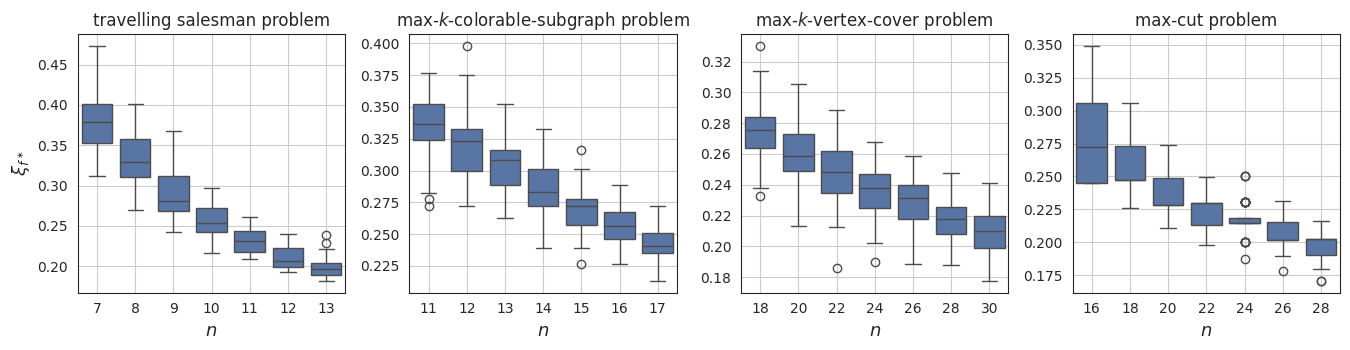

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(13.6, 4))
sns.set_style('white')

datasets = [df_tsp, df_mkcs, df_mkvc, df_mc]
titles = ['travelling salesman problem', r'max-$k$-colorable-subgraph problem', r'max-$k$-vertex-cover problem', 'max-cut problem']

for i, (data, title) in enumerate(zip(datasets, titles)):
    colors = sns.color_palette('deep')
    sns.boxplot(x='n', y='stdOverOptMinusMean', data=data, color=colors[0], ax=axs[i])
    axs[i].set_xlabel(r"$n$", fontsize=13)
    axs[i].set_title(title)
    axs[i].grid()

    if i == 0:
        axs[i].set_ylabel(r"$\xi_{f^\ast}$", fontsize=13)
    else:
        axs[i].set_ylabel('') 

plt.tight_layout(rect=[0, 0, 1, 0.9]) 
plt.savefig('./figs/xi.pdf')
plt.show()